# Assignment 1: K-Center, K-Means, and HAC
## CS 6180: Clustering
## Michael Young / u0742759

### Problem 1

Implement the K-Center (aka FurthestPoint) algorithm using euclidean distance as the distance function. Using your K-Center implementation, evaluate data1.csv with 3 centers and then try with 4 centers. Next assign each point to its nearest center (using euclidean distance as the distance function) and generate a scatter plot where each cluster is represented by a different color. Also, represent the cluster centers as solid black.  

Using this same data set run K-Means using 3 centers and produce similar plots as described previously. Compare and contrast the results with K-Centers, what are the differences you are seeing. Feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans). Finally produce two cost function plots with # centers along the x-axis and cost of that clustering along the y-axis. Do this for both algorithms (K-Center and K-Means).  



[[ 0.00000000e+00  7.41676658e+00  8.24678858e+00  1.00000000e+00]
 [ 1.00000000e+00  2.21450825e+00  1.29828096e+01  1.00000000e+00]
 [ 2.00000000e+00  1.09242264e+01  6.34801951e+00  1.00000000e+00]
 ...
 [ 5.97000000e+02  4.47583144e-01 -9.06053065e+00  3.00000000e+00]
 [ 5.98000000e+02  3.86501491e+00  5.68675885e+00  1.00000000e+00]
 [ 5.99000000e+02  6.99339878e+00  4.37396330e+00  1.00000000e+00]]


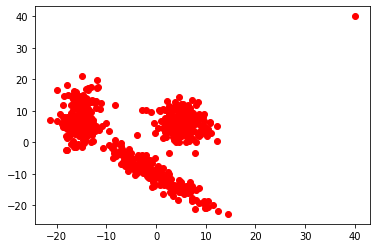

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the Data
f = np.loadtxt(open("data1.csv", "rb"), delimiter=",", skiprows=1)

print(f)
# Plotting data to see if any kind of obvious clustering
x = f[:,1]
y = f[:,2]

plt.plot(x,y,'or')
plt.show()

In [82]:
# K-center (aka furthest point)

# First step, lets compute pairwise L2 distance between
# every point and store in a matrix where indices correspond to cluster point

dim = len(f[:])
dists = np.zeros((dim,dim))

# At some point try to develop vectorized implementation
for i in f:
    for j in f:
        dists[int(i[0]),int(j[0])] = np.sqrt((i[1] - j[1])**2 + (i[2]-j[2])**2)

#print(dists[1][0])


In [129]:
# K-center continued

# Choose k
k = 3

# Dict of clusters
clusters = {}
# List of centers
C = []

# Pick an arbitrary point and assign it as first center c1
# I'll make this random for the h*ll of it
rando = np.random.randint(0,600)
clusters[rando] = {rando}
C.append(rando)
#print(C)

# Let's assign every point to this first cluster
for i in range(dim):
    clusters[rando].add(i)

#print(clusters)
# Gonzalez algo
for i in range(1,k):
    max_dists = []
    #print(i)
    # For each center thus far, find the max distance away from these centers, assign new
    # center to the largest of these
    for cent in C:
        # Compute distance between every point in a cluster and its nearest center
        my_dists = [(dists[j,cent],j) for j in clusters[cent]]
        #print(my_dists)
        # Return max values along with its index
        max_dists.append((max(my_dists))) #,np.argmax(my_dists)))
    #print(max_dists)
    
    # Assign new center
    new_center = max(max_dists, key = lambda x: x[0])[1]
    C.append(new_center)
    clusters[new_center] = {new_center}
    #print(C)
    
    # Reassign points to their closest center
    new_clusters = []
    for x in f:
        x_dists = []
        for cent in C:
            # loops through points distances to every center and stores them along with center
            x_dists.append((dists[int(x[0])][cent],cent))
        # finds which center the point is closest to 
        x_new_c = min(x_dists)[1]
        #print(x_new_c)
        
        # Now I need to assign point to new cluster and remove from the old
        # I'm not feeling particularly clever rn, so I'll just loop through clusters
        # And remove current point, then add it to right cluster
        
        for clust in clusters:
            #print(clusters[clust])
            # remove point from all clusters
            if int(x[0]) in clusters[clust]:
                clusters[clust].remove(int(x[0]))
            # add it back to correct cluster
            clusters[x_new_c].add(int(x[0]))
            
print(C)
#print(clusters)

# Need to develop an idea of 'Cost' for the entire clustering...
# I think this is just the max distance between a point and its nearest center? so max of all of such points?

# Lets just loop through each cluster, store max's in array and take max of that - that value will be the 
# overall cost 

cost = []
for h in clusters:
    clust_cost = []
    #print(h)
    for q in list(clusters[h]):
        #print(k)
        clust_cost.append(dists[q,h])
    cost.append(max(clust_cost))
#print(cost)
print("cost: ",max(cost),"for {} clusters".format(k))
        

[224, 9, 99]
cost:  26.70008429111221 for 3 clusters


In [130]:
#cost:  65.77683908746468 for 1 clusters
#cost:  46.28100234263184 for 2 clusters
#cost:  24.10286656048513 for 3 clusters
#cost:  21.959605496598073 for 4 clusters
#cost:  14.10407297851105 for 5 clusters
#cost:  12.543981001740528 for 6 clusters
#cost:  13.042772937235409 for 7 clusters
#cost:  11.570941692036605 for 8 clusters
#cost:  10.372017979455759 for 9 clusters
#cost:  9.718753953028038 for 10 clusters

k_cent_costs = [65.77683908746468,46.28100234263184,24.10286656048513, 21.959605496598073,14.10407297851105,
               12.543981001740528,13.042772937235409,11.570941692036605,10.372017979455759, 9.718753953028038]

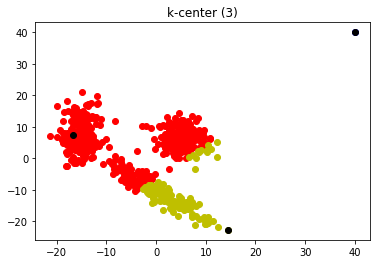

In [116]:
# Now for plotting when k = 3 

# Now I convert from points back to my original point values
m = {}
for idx,l in enumerate(list(clusters.values())):
    #print(idx,l)
    m[idx] = np.array([f[i,:] for i in l])
#print(m)
plt.plot(m[0][:,1],m[0][:,2],'or')
plt.plot(m[1][:,1],m[1][:,2],'ob')
plt.plot(m[2][:,1],m[2][:,2],'oy')

# Need to make centers black
plt.plot(f[C[0],1],f[C[0],2],'ok')
plt.plot(f[C[1],1],f[C[1],2],'ok')
plt.plot(f[C[2],1],f[C[2],2],'ok')

#plt.plot(C[3][:,1],C[3][:,2],'oc')
plt.title("k-center ({})".format(k))
plt.show()

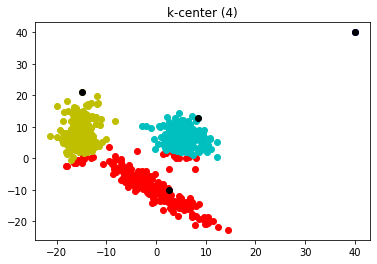

In [121]:
# Now for plotting when k = 4 

# Now I convert from points back to my original point values
m = {}
for idx,l in enumerate(list(clusters.values())):
    #print(idx,l)
    m[idx] = np.array([f[i,:] for i in l])
#print(m)
plt.plot(m[0][:,1],m[0][:,2],'or')
plt.plot(m[1][:,1],m[1][:,2],'ob')
plt.plot(m[2][:,1],m[2][:,2],'oy')
plt.plot(m[3][:,1],m[3][:,2],'oc')
#plt.plot(m[4][:,1],m[4][:,2],'og')

# Need to make centers black
plt.plot(f[C[0],1],f[C[0],2],'ok')
plt.plot(f[C[1],1],f[C[1],2],'ok')
plt.plot(f[C[2],1],f[C[2],2],'ok')
plt.plot(f[C[3],1],f[C[3],2],'ok')
#plt.plot(f[C[4],1],f[C[4],2],'ok')

#plt.plot(C[3][:,1],C[3][:,2],'oc')
plt.title("k-center ({})".format(k))
plt.show()

Text(0.5, 1.0, 'K-means')

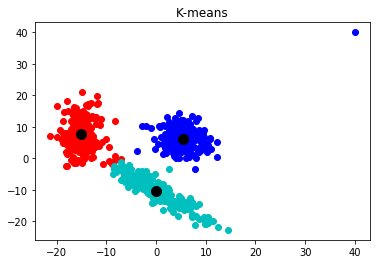

In [40]:
# K - Means 
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

X = f[:,1:3].reshape(len(f),2)
y_km = km.fit_predict(X)

#print(y_km)

plt.plot(f[y_km == 0, 1],f[y_km == 0, 2],"or")
plt.plot(f[y_km == 1, 1],f[y_km == 1, 2],"ob")
plt.plot(f[y_km == 2, 1],f[y_km == 2, 2],"oc")
# Plot the centers
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means")


**Compare and contrast:** These algorithms have a very similar flavor, but end up yielding markedly different results when confronted with outliers. The k-center algo, by virture of the farthest points algorithm is very sensitive to outliers and always ends up making the outlier its own cluster, which may or may not be desirable. K-means on the other hand is very insensitive to outliers and just incorporates the outlier into the nearest actual cluster, which again, may or may not be desirable. K-means is also a bit more sophisticated in the sense that it can update its center representations, whereas k-center is sort of stuck and very dependent on whatever the first point chosen is. Overall, k-means appears to do a much better job on this particular dataset.

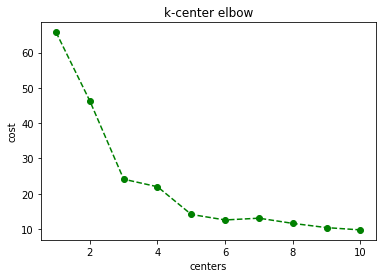

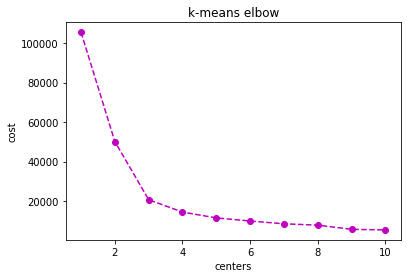

In [146]:
# Cost function plots w/ # centers on X and cluster cost on Y

plt.plot(range(1,11),k_cent_costs,"--g",marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-center elbow")
plt.show()

# Calculate k-means costs
costs_km = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    costs_km.append(km.inertia_)

plt.plot(range(1,11),costs_km,'--m',marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-means elbow")
plt.show()

The elbow curve for the k-center is a bit more jagged than for k-means, which is likely because I didn't run the algorithm multiple times and take the average which is basically when the k-means implementation does. The k-means curve shows that 3 is the likely optimal k, and examining the plot shows that. the curve for the k-center is a bit more ambiguous, but I think it's likely that 4 is the best choice based on the plots. 

### Problem 2

A) Generate your own data sets for running K-Means. Explore how changing the data generating distribution (mean, variance etc) causes K-Means to start to “break”. Again, feel free to use an out-of-the-box K-Means (eg. sklearn.cluster.KMeans).  
  
For data generation Python has make_blobs or see below for some sample code that produces a 2D Gaussian distributed np.array.  


B) Plot the cost of the solution as a function of k. Give a description with plots of the output.


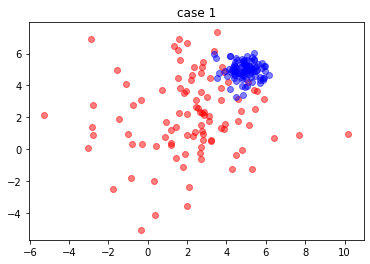

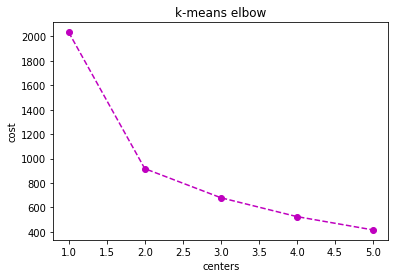

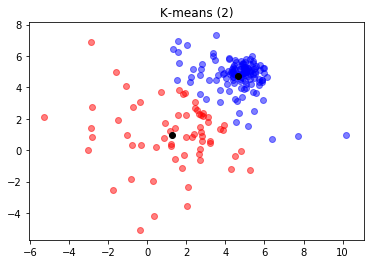

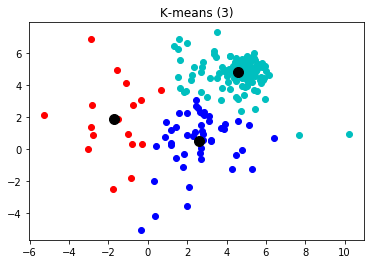

In [219]:
def getCluster(n,muX,varX,muY,varY,c):
    X = np.random.normal(muX, varX, n)
    Y = np.random.normal(muY, varY, n)
    Z = np.repeat(c, n)
    return np.column_stack((X, Y, Z))


n = 100
C1 = getCluster(n, 2, 2.5, 2, 2.5, 1)
C2 = getCluster(n, 5, 0.5, 5, 0.5, 2)

C = np.concatenate((C1,C2))
#print(C[:,0:2])
# plt.ylim([-3, 9]) # this just helps make the plot square
# plt.xlim([-3, 9]) # this just helps make the plot square
#plt.gca().set_aspect('equal', adjustable='box') # this just helps make the plot square
plt.scatter(C1[:,0], C1[:,1], color='red', alpha=0.5);
plt.scatter(C2[:,0], C2[:,1], color='blue', alpha=0.5);
plt.title("case 1")
plt.show()

# Lets experiment with some k-means
Case1 = C[:,0:2]

# Calculate k-means costs
costs_km = []
y_km = []
my_km =[]
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Case1)
    my_km.append(km)
    costs_km.append(km.inertia_)
    y_km.append(km.fit_predict(Case1))

#print(y_km)
    
# Plot elbow curve 
plt.plot(range(1,6),costs_km,'--m',marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-means elbow")
plt.show()

# Plot k=2 and k =3
# K=2
plt.scatter(Case1[y_km[1] == 0, 0],Case1[y_km[1] == 0, 1],color='red', alpha=0.5)
plt.scatter(Case1[y_km[1] == 1, 0],Case1[y_km[1] == 1, 1],color='blue', alpha=0.5)
# Plot the centers
plt.scatter(my_km[1].cluster_centers_[:,0],my_km[1].cluster_centers_[:,1], color='black', alpha=1)
plt.title("K-means (2)")
plt.show()

# K=3
plt.plot(Case1[y_km[2] == 0, 0],Case1[y_km[2] == 0, 1],"or")
plt.plot(Case1[y_km[2] == 1, 0],Case1[y_km[2] == 1, 1],"ob")
plt.plot(Case1[y_km[2] == 2, 0],Case1[y_km[2] == 2, 1],"oc")
# Plot the centers
plt.plot(my_km[2].cluster_centers_[:,0],my_km[2].cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means (3)")
plt.show()



**Case 1 discussion:** For this case I wanted to see whether k means could do a good job clustering a dense blob as well as a more diffuse blob when they're close together. I plotted k=2 and k=3 because they showed the best cost reduction. K=2 is the natural clustering here, and it looks like k-means did pretty well. There's a center located pretty close to the center of the dense blob, and another in the center of the diffuse blob. There were a lot of diffuse points capture in the dense cluster, but overall it performed better than I expected. 

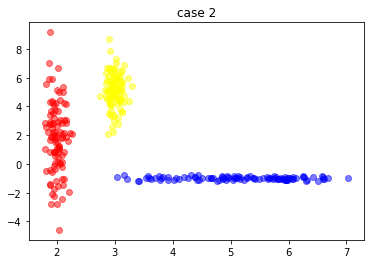

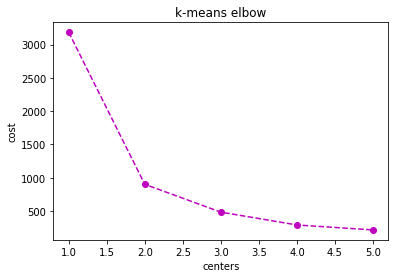

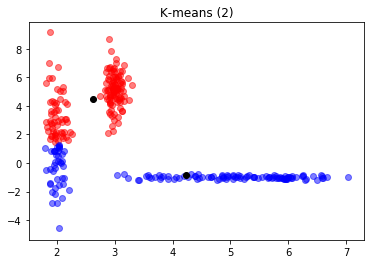

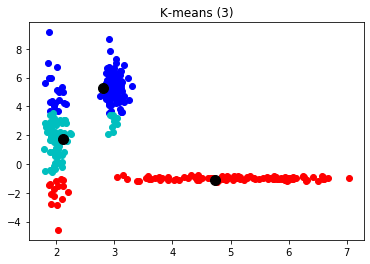

In [225]:
# Case 2

def getCluster(n,muX,varX,muY,varY,c):
    X = np.random.normal(muX, varX, n)
    Y = np.random.normal(muY, varY, n)
    Z = np.repeat(c, n)
    return np.column_stack((X, Y, Z))


n = 100
C1 = getCluster(n, 2, 0.1, 2, 2.5, 1)
C2 = getCluster(n, 5, 1, -1, 0.1, 2)
C3 = getCluster(n, 3, 0.1, 5, 1.2, 2)

C = np.concatenate((C1,C2,C3))
#print(C[:,0:2])
# plt.ylim([-3, 9]) # this just helps make the plot square
# plt.xlim([-3, 9]) # this just helps make the plot square
#plt.gca().set_aspect('equal', adjustable='box') # this just helps make the plot square
plt.scatter(C1[:,0], C1[:,1], color='red', alpha=0.5);
plt.scatter(C2[:,0], C2[:,1], color='blue', alpha=0.5);
plt.scatter(C3[:,0], C3[:,1], color='yellow', alpha=0.5);
plt.title("case 2")
plt.show()

# Lets experiment with some k-means
Case1 = C[:,0:2]

# Calculate k-means costs
costs_km = []
y_km = []
my_km =[]
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Case1)
    my_km.append(km)
    costs_km.append(km.inertia_)
    y_km.append(km.fit_predict(Case1))

#print(y_km)
    
# Plot elbow curve 
plt.plot(range(1,6),costs_km,'--m',marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-means elbow")
plt.show()

# Plot k=2 and k =3
# K=2
plt.scatter(Case1[y_km[1] == 0, 0],Case1[y_km[1] == 0, 1],color='red', alpha=0.5)
plt.scatter(Case1[y_km[1] == 1, 0],Case1[y_km[1] == 1, 1],color='blue', alpha=0.5)
# Plot the centers
plt.scatter(my_km[1].cluster_centers_[:,0],my_km[1].cluster_centers_[:,1], color='black', alpha=1)
plt.title("K-means (2)")
plt.show()

# K=3
plt.plot(Case1[y_km[2] == 0, 0],Case1[y_km[2] == 0, 1],"or")
plt.plot(Case1[y_km[2] == 1, 0],Case1[y_km[2] == 1, 1],"ob")
plt.plot(Case1[y_km[2] == 2, 0],Case1[y_km[2] == 2, 1],"oc")
# Plot the centers
plt.plot(my_km[2].cluster_centers_[:,0],my_km[2].cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means (3)")
plt.show()

**Case 2 discussion:** For this case, I wanted to explore how well k-means would perform on clusters of a more line-y flavor. As seen, it performs rather poorly. Because K-means is all about the means, it tends to want to cluster blobbily (that is, spherically), and this doesn't work well when we have clusters that aren't blobs. This case reiterates the importance of knowing something about the structure of your data before you cluster. In this case, something link single link HAC would likely work "better", i.e. cluster these lines more effectively. DB-scan could also perform well.

### Problem 3  

Download data2.csv and run K-Means. Experiment with different values for k and visualize and discuss the results.

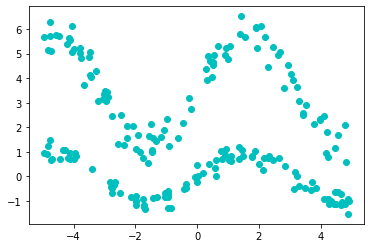

In [152]:
# Load the data 

D2 = np.loadtxt(open("data2.csv", "rb"), delimiter=",", skiprows=1)

#print(D2)
# Plotting data to see if any kind of obvious clustering
x2 = D2[:,1]
y2 = D2[:,2]

plt.plot(x2,y2,'oc')
plt.show()

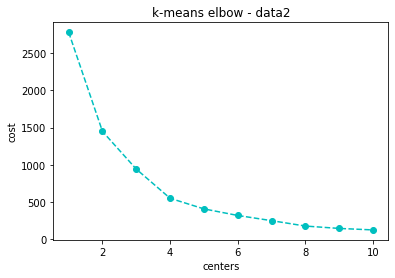

In [162]:
# Lets see how K-means performs, my guess is it won't do well :/
# I'll first take a look at the costs to see what some potentially
# good k values are

X2 = D2[:,1:3].reshape(len(D2),2)
# Calculate k-means costs
costs_km2 = []
y_km2 = []
my_km =[]
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    my_km.append(km)
    km.fit(X2)
    y_km2.append(km.fit_predict(X2))
    costs_km2.append(km.inertia_)
    
plt.plot(range(1,11),costs_km2,'--c',marker='o')
plt.xlabel("centers")
plt.ylabel("cost")
plt.title("k-means elbow - data2")
plt.show()

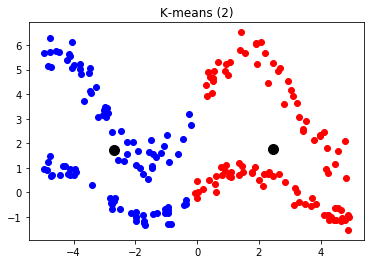

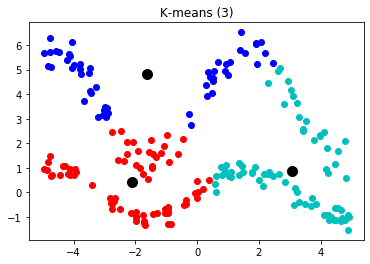

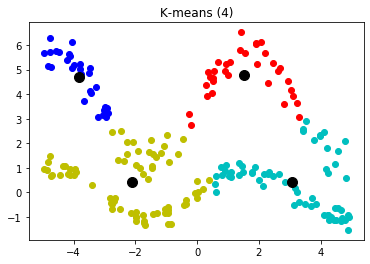

In [170]:
# It looks like somewhere between 3 and 5 is good, let's look at those
#print(y_km2)


# K=2
plt.plot(D2[y_km2[1] == 0, 1],D2[y_km2[1] == 0, 2],"or")
plt.plot(D2[y_km2[1] == 1, 1],D2[y_km2[1] == 1, 2],"ob")
# Plot the centers
plt.plot(my_km[1].cluster_centers_[:,0],my_km[1].cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means (2)")
plt.show()

# K=3
plt.plot(D2[y_km2[2] == 0, 1],D2[y_km2[2] == 0, 2],"or")
plt.plot(D2[y_km2[2] == 1, 1],D2[y_km2[2] == 1, 2],"ob")
plt.plot(D2[y_km2[2] == 2, 1],D2[y_km2[2] == 2, 2],"oc")
# Plot the centers
plt.plot(my_km[2].cluster_centers_[:,0],my_km[2].cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means (3)")
plt.show()

# K=4
plt.plot(D2[y_km2[3] == 0, 1],D2[y_km2[3] == 0, 2],"or")
plt.plot(D2[y_km2[3] == 1, 1],D2[y_km2[3] == 1, 2],"ob")
plt.plot(D2[y_km2[3] == 2, 1],D2[y_km2[3] == 2, 2],"oc")
plt.plot(D2[y_km2[3] == 3, 1],D2[y_km2[3] == 3, 2],"oy")
# Plot the centers
plt.plot(my_km[3].cluster_centers_[:,0],my_km[3].cluster_centers_[:,1],"ok",ms=10)
plt.title("K-means (4)")
plt.show()


**Discussion:** Examining the raw data set, it looks like two different noisy sine waves. Intuitively, a "good" clustering might be to have each one of these waves be a cluster. Unfortunately, it's pretty clear from the exploration that k-means is not capable of clustering this particular dataset in this intuitively "good" way. For two clusters, which seems like the "right" amount of clusters, it partitions them by cutting each wave in half. It's possible that by an alternative initialize of the initial points it could arrive at a better result, but that may be rare. For more than two clusters we again get some odd combos of clusters that may or may not be useful but certainly aren't immediately identifiable as "good." 

### Problem 4.  
  
Use the K-Center procedure described in Problem 1 to implement a different HAC algorithm based on the discussion in class. Apply this algorithm to data2.csv experimenting with different values for k and visualize and discuss results.  

**Solution:** I think for this particular data-set, the single-link HAC algo will work really well, or at least cluster it in the way I think is good, so I'll implement that.

In [299]:
# Single Link HAC implementation

D2 = np.loadtxt(open("data2.csv", "rb"), delimiter=",", skiprows=1)
# Single link clustering:
#print(D2)
#D2 = np.split(D2,10)[0]
#print(D2)
# The distance between two clusters is the minimum 
# pairwise distance between points in the clusters

# If two points are close enough, put them in the same cluster, then repeat.
    
dists = {}
# Will do a naive for loop implementation, storing distances in dictionary
for p in D2:
    for idx,i in enumerate(D2):
        if i[0] != p[0]:
            if (p[0],i[0]) not in dists and (i[0],p[0]) not in dists:
                dists[(p[0],i[0])] = np.sqrt((p[1] - i[1])**2 + (p[2]-i[2])**2)

#print(dists)
# Sorted dict
dists_sorted = list({k: v for k, v in sorted(dists.items(), key=lambda item: item[1])}.items())
#print("Sorted:",dists_sorted)

# Now for the algorithm itself

clusters = {}
# First, make every point its own cluster, and add point to cluster in set
for i in D2:
    clusters[i[0]] = {i[0]}
#print("clusters at start:",clusters)

for idx,k in enumerate(dists_sorted):
    #print(dists_sorted.pop(0)[0])
    #print(clusters[k[0][1]])
    p1 = k[0][0]
    p2 = k[0][1]
    #print(p1,p2)
    c1 = None
    c2 = None
    
    # Find which clusters the points are in 
    for cluster, points in clusters.items():
        if p1 in points:
            c1 = cluster
            
    for cluster, points in clusters.items():
        #print(cluster,points)
        if p2 in points:
            c2 = cluster
            
    # If two points already in same cluster, we bypass them
    if c1 != c2:
        # Add point (or points cluster) to the orginal cluster and delete old cluster
        # Will merge smaller with bigger and if they have same length, merge arbitrarily
        sizeC1 = len(clusters[c1])
        sizeC2 = len(clusters[c2])

        if sizeC1 > sizeC2:
            # merge C2 to C1
            for j in clusters[c2]:
                clusters[c1].add(j)
            clusters.pop(c2)

        else:
            # merge C1 to C2
            for j in clusters[c1]:
                clusters[c2].add(j)
            clusters.pop(c1)
        
    # Condition that stops algo at q = 4 clusters
    q = 3
    if len(clusters) == q:
        break
        
#print("clusters at end:",clusters)


# Now I convert from points back to my original point values
M = {}
for idx,l in enumerate(list(clusters.values())):
    print(idx,l)
    M[idx] = np.array([D2[int(i)] for i in l])

#print(M)
# FINALLY, I plot:

# x = f[:,1]
# y = f[:,2]

# plt.plot(M[0][:,1],M[0][:,2],'or')
# plt.plot(M[1][:,1],M[1][:,2],'ob')
# # plt.plot(M[2][:,1],M[2][:,2],'oy')
# # plt.plot(M[3][:,1],M[3][:,2],'oc')
# plt.title("Single Link")
# plt.show()

0 {0.0, 130.0, 2.0, 4.0, 135.0, 11.0, 140.0, 139.0, 145.0, 21.0, 152.0, 26.0, 28.0, 157.0, 156.0, 29.0, 160.0, 32.0, 33.0, 164.0, 39.0, 171.0, 45.0, 175.0, 181.0, 57.0, 58.0, 188.0, 62.0, 192.0, 66.0, 197.0, 71.0, 74.0, 81.0, 84.0, 85.0, 87.0, 94.0, 99.0, 113.0, 117.0, 119.0, 120.0, 124.0}
1 {129.0, 5.0, 134.0, 7.0, 137.0, 12.0, 13.0, 141.0, 15.0, 144.0, 142.0, 16.0, 147.0, 149.0, 22.0, 150.0, 30.0, 31.0, 34.0, 163.0, 169.0, 170.0, 46.0, 174.0, 176.0, 51.0, 52.0, 54.0, 183.0, 185.0, 186.0, 187.0, 189.0, 190.0, 68.0, 196.0, 70.0, 69.0, 198.0, 80.0, 83.0, 92.0, 93.0, 95.0, 98.0, 100.0, 101.0, 102.0, 105.0, 108.0, 109.0, 110.0, 116.0, 122.0, 127.0}
2 {1.0, 3.0, 6.0, 8.0, 9.0, 10.0, 14.0, 17.0, 18.0, 19.0, 20.0, 23.0, 24.0, 25.0, 27.0, 35.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 44.0, 47.0, 48.0, 49.0, 50.0, 53.0, 55.0, 56.0, 59.0, 60.0, 61.0, 63.0, 64.0, 65.0, 67.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 79.0, 82.0, 86.0, 88.0, 89.0, 90.0, 91.0, 96.0, 97.0, 103.0, 104.0, 106.0, 107.0, 11

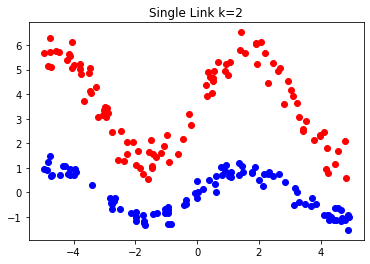

In [298]:
plt.plot(M[0][:,1],M[0][:,2],'or')
plt.plot(M[1][:,1],M[1][:,2],'ob')
# plt.plot(M[2][:,1],M[2][:,2],'oy')
# plt.plot(M[3][:,1],M[3][:,2],'oc')
plt.title("Single Link k=2")
plt.show()

**Discussion:** Beautiful! As conjectured, single link clusters this data set really well. The way HAC works (specifically single-link HAC), by iteratively joining clusters one at a time based on distance, is well suited for data sets that have clear clusters that aren't very blobby. 

I'm not sure much more experimentation is needed, but let's look at what happens when we do 3 clusters with single link. It looks like for that top cluster, there's a big space right in the middle that may be where separation occurs.

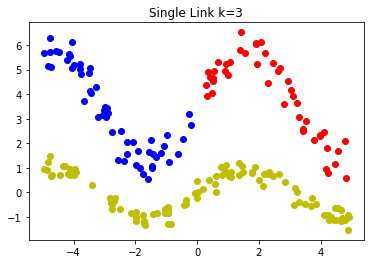

In [300]:
plt.plot(M[0][:,1],M[0][:,2],'or')
plt.plot(M[1][:,1],M[1][:,2],'ob')
plt.plot(M[2][:,1],M[2][:,2],'oy')
# plt.plot(M[2][:,1],M[2][:,2],'oy')
# plt.plot(M[3][:,1],M[3][:,2],'oc')
plt.title("Single Link k=3")
plt.show()

As conjectured, single link with 3 clusters has that top cluster split into two. I think the big takeaway from this is once again - it's critical to have some insight into the raw structure of your data before you choose clustering methods. This can be difficult when one has high dimensional data sets, but using some sort of Dim-Reduction technique such as PCA or t-SNE or U-MAP can help to guide us towards a potential clustering algo.

In [9]:
from sklearn.cluster import AgglomerativeClustering as HAC

x = np.array([2,1,2,1.5,2])
y = np.array([5,4,2,-1,1])
data = np.column_stack((x,y))
print(data)

singleL = HAC(n_clusters=3,linkage="single").fit(data).labels_
completeL = HAC(n_clusters=3,linkage='complete').fit(data).labels_

print(singleL)
print(completeL)


[[ 2.   5. ]
 [ 1.   4. ]
 [ 2.   2. ]
 [ 1.5 -1. ]
 [ 2.   1. ]]
[0 0 1 2 1]
[0 0 1 2 1]
